Gennemsnitlige sviningstider:
[1.938 1.94  1.961 1.984 2.016]
Spredning af sviningstider:
[0.019 0.003 0.003 0.004 0.003]


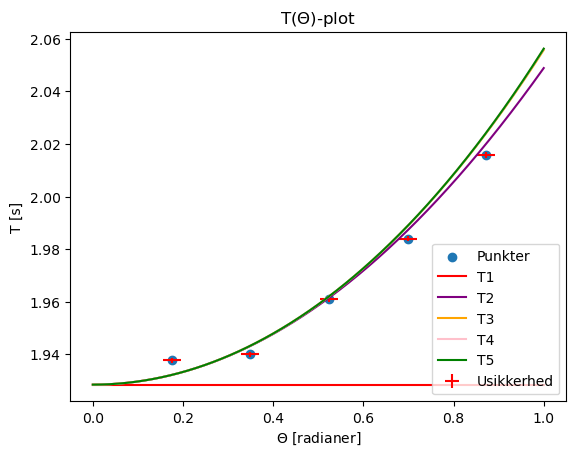

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

# Indlæs data
xls = pd.ExcelFile(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 7 - Pendul 2\Labuge_7.xlsx")
S1 = pd.read_excel(xls, '10 grader')
S2 = pd.read_excel(xls, '20 grader')
S3 = pd.read_excel(xls, '30 grader')
S4 = pd.read_excel(xls, '40 grader')
S5 = pd.read_excel(xls, '50 grader')

# Konverter np arrays
G10 = np.array(S1)
G20 = np.array(S2)
G30 = np.array(S3)
G40 = np.array(S4)
G50 = np.array(S5)

# Usikkerhed for aflæsning af vinkel [radianer] og svingingstid [S]
dTheta = round(np.radians(1), 2)
dT = 0.001

# Gennemsnit af T-værdier for forskellige Theta [s]
mean_G10 = np.mean(G10)
mean_G20 = np.mean(G20)
mean_G30 = np.mean(G30)
mean_G40 = np.mean(G40)
mean_G50 = np.mean(G50)

# Spredning af T-værdier for forskellige Theta [s]
Sigma_G10 = np.std(G10)
Sigma_G20 = np.std(G20)
Sigma_G30 = np.std(G30)
Sigma_G40 = np.std(G40)
Sigma_G50 = np.std(G50)

# Snorlængde [m]
L = 0.925

# Rækken med forskellige led (Tn -> n led)
T1 = lambda x : 2*np.pi*np.sqrt(L/9.82)
T2 = lambda x : 2*np.pi*np.sqrt(L/9.82) * (1 + (1/16)*x**2)
T3 = lambda x : 2*np.pi*np.sqrt(L/9.82) * (1 + (1/16)*x**2 + (11/3072)*x**4)
T4 = lambda x : 2*np.pi*np.sqrt(L/9.82) * (1 + (1/16)*x**2 + (11/3072)*x**4 + (173/737280)*x**6)
T5 = lambda x : 2*np.pi*np.sqrt(L/9.82) * (1 + (1/16)*x**2 + (11/3072)*x**4 + (173/737280)*x**6 + (22931/1321205760)*x**8)

# Theta / T plot
X = np.array([np.radians(num) for num in [10, 20, 30, 40, 50]])
Y = [mean_G10, mean_G20, mean_G30, mean_G40, mean_G50]

plt.figure(1)
plt.scatter(X, Y, label="Punkter")
plt.errorbar(X, Y, xerr=dTheta, yerr=dT, fmt=" ", color="red", label="Usikkerhed")

# Plot rækkerne
X = np.linspace(0, 1, 1000)

Y = np.array([T1(num) for num in X])
plt.plot(X, Y, label="T1", color="red")

Y = np.array([T2(num) for num in X])
plt.plot(X, Y, label="T2", color="purple")

Y = np.array([T3(num) for num in X])
plt.plot(X, Y, label="T3", color="orange")

Y = np.array([T4(num) for num in X])
plt.plot(X, Y, label="T4", color="pink")

Y = np.array([T5(num) for num in X])
plt.plot(X, Y, label="T5", color="green")

ax = plt.gca()
ax.set_title(r"T($\Theta)$-plot")
ax.set_xlabel(r"$\Theta$ [radianer]")
ax.set_ylabel(r"T [s]")
plt.legend(loc="lower right")

print("Gennemsnitlige svingningstider:")
print(np.round(np.array([mean_G10, mean_G20, mean_G30, mean_G40, mean_G50]), 3))

print("Spredning af svingningstider:")
print(np.round(np.array([Sigma_G10, Sigma_G20, Sigma_G30, Sigma_G40, Sigma_G50]), 3))

pdp = PdfPages(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 7 - Pendul 2\plots.pdf")
pdp.savefig(1)
pdp.close()
